In [1]:
import pandas as pd

In [2]:
!pip3 install -U ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
# fetch dataset
dia_130 = fetch_ucirepo(id=296)
# metadata
print("A metadata Description")
print(dia_130.metadata)

print(dia_130.shape)

#variable information
print(dia_130.variables)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


A metadata Description
{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control.

In [5]:
# data (as pandas dataframes)
X_130 = dia_130.data.features
y_130 = dia_130.data.targets

print("DataFrame")
pandas_df = pd.DataFrame(X_130, columns=dia_130.feature_names)


DataFrame


In [6]:
v1_130 = pandas_df.isnull().sum()
print(v1_130)

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [7]:
pandas_df.drop(['weight','payer_code','medical_specialty'], axis = 1, inplace = True)
pandas_df = pandas_df.dropna(subset=['race','diag_1', 'diag_2', 'diag_3'])
y_130_aligned = y_130.loc[pandas_df.index]
print(pandas_df.shape)
print("Features and number of NaN values per feature/column")
v1_130 = pandas_df.isnull().sum()
print(v1_130)
print(y_130_aligned)
print(y_130_aligned.shape)


(98053, 44)
Features and number of NaN values per feature/column
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               92845
A1Cresult                   81860
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide      

In [8]:
print(pandas_df.head())
print(pandas_df.dtypes)

              race  gender      age  admission_type_id  \
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   
5        Caucasian    Male  [50-60)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   
5                         1                    2                 3   

   num_lab_procedures  num_procedures  num_medications  ...  examide  \
1                  59               0               18  ...       No   
2                  11               5               13  ...       No   
3             

In [9]:
pandas_df_tar = pd.DataFrame(y_130_aligned, columns=dia_130.target_names)
print(pandas_df_tar.shape)
print(pandas_df_tar.isnull().sum())

(98053, 1)
readmitted    0
dtype: int64


map diagnosis codes to categories

In [10]:
# Step 1: Read the CSV and create the mapping dictionary
icd_9_codes_url = 'https://raw.githubusercontent.com/brotaur/MLdiabetes/main/Converstion%20table2.csv'
icd_9_codes_df = pd.read_csv(icd_9_codes_url, encoding='ISO-8859-1')
icd_9_code_mapping = icd_9_codes_df.set_index('Diag Code')['Diag Category'].to_dict()

# Step 2: Apply the mapping to your DataFrame
icd_9_columns = ['diag_1', 'diag_2', 'diag_3']

for column in icd_9_columns:
    pandas_df[column] = pandas_df[column].map(icd_9_code_mapping)

# At this point, diag_1, diag_2, and diag_3 in your DataFrame have been replaced
# with their corresponding diagnostic categories from the CSV
print(pandas_df)


                   race  gender      age  admission_type_id  \
1             Caucasian  Female  [10-20)                  1   
2       AfricanAmerican  Female  [20-30)                  1   
3             Caucasian    Male  [30-40)                  1   
4             Caucasian    Male  [40-50)                  1   
5             Caucasian    Male  [50-60)                  2   
...                 ...     ...      ...                ...   
101761  AfricanAmerican    Male  [70-80)                  1   
101762  AfricanAmerican  Female  [80-90)                  1   
101763        Caucasian    Male  [70-80)                  1   
101764        Caucasian  Female  [80-90)                  2   
101765        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
2                              1                    7                 2   
3                 

In [11]:
# Step 2: Inspect unique values after mapping
print("Unique categories in 'diag_1' after mapping:", pandas_df['diag_1'].unique()[:10])

# Step 3: Sample rows check
print("Sample rows from the DataFrame:")
print(pandas_df[['diag_1', 'diag_2', 'diag_3']].sample(5))

# Step 4: Check for unmapped codes (assuming all codes should be mapped)
unmapped_check = pandas_df[['diag_1', 'diag_2', 'diag_3']].isnull().any()
print("Columns with unmapped codes:", unmapped_check)


Unique categories in 'diag_1' after mapping: ['Other metabolic and immunity disorders'
 'Complications Mainly Related To Pregnancy'
 'Intestinal infectious diseases'
 'Malignant neoplasm of other and unspecified sites'
 'Ischemic Heart Disease' 'Other Forms Of Heart Disease'
 'Chronic Rheumatic Heart Disease' 'Cerebrovascular Disease'
 'Diabetes mellitus'
 'Malignant neoplasm of digestive organs and peritoneum']
Sample rows from the DataFrame:
                             diag_1  \
58442       Cerebrovascular Disease   
90643  Other Forms Of Heart Disease   
40857                      Symptoms   
59862    Hernia Of Abdominal Cavity   
90780        Ischemic Heart Disease   

                                                  diag_2  \
58442  Chronic Obstructive Pulmonary Disease And Alli...   
90643                            Pneumonia And Influenza   
40857                Arthropathies And Related Disorders   
59862                               Hypertensive Disease   
90780            

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize one LabelEncoder per column to keep track of the mappings
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()

# Apply Label Encoding for 'diag_1', 'diag_2', 'diag_3'
pandas_df['diag_1_encoded'] = label_encoder_diag_1.fit_transform(pandas_df['diag_1'])
pandas_df['diag_2_encoded'] = label_encoder_diag_2.fit_transform(pandas_df['diag_2'])
pandas_df['diag_3_encoded'] = label_encoder_diag_3.fit_transform(pandas_df['diag_3'])

# Display the first few rows to verify the encoded columns
print(pandas_df[['diag_1', 'diag_1_encoded', 'diag_2', 'diag_2_encoded', 'diag_3', 'diag_3_encoded']].head())
print(pandas_df)


                                              diag_1  diag_1_encoded  \
1             Other metabolic and immunity disorders              98   
2          Complications Mainly Related To Pregnancy              15   
3                     Intestinal infectious diseases              57   
4  Malignant neoplasm of other and unspecified sites              66   
5                             Ischemic Heart Disease              59   

                                              diag_2  diag_2_encoded  \
1                                  Diabetes mellitus              28   
2                                  Diabetes mellitus              28   
3                                  Diabetes mellitus              28   
4  Malignant neoplasm of digestive organs and per...              74   
5                             Ischemic Heart Disease              69   

                                              diag_3  diag_3_encoded  
1                        Disorders of adrenal glands           

In [13]:
label_encoder_race = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_change = LabelEncoder()
label_encoder_diabetesMed = LabelEncoder()

# Apply Label Encoding for race, gender, change, and diabetesMed
pandas_df['race'] = label_encoder_diag_1.fit_transform(pandas_df['race'])
pandas_df['gender'] = label_encoder_diag_2.fit_transform(pandas_df['gender'])
pandas_df['change'] = label_encoder_diag_3.fit_transform(pandas_df['change'])
pandas_df['diabetesMed'] = label_encoder_diag_1.fit_transform(pandas_df['diabetesMed'])


print(pandas_df[['race', 'gender', 'change','diabetesMed']].head())

   race  gender  change  diabetesMed
1     2       0       0            1
2     0       0       1            1
3     2       1       0            1
4     2       1       0            1
5     2       1       1            1


In [14]:
pandas_df.dtypes

race                         int64
gender                       int64
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [15]:
pandas_df['A1Cresult'].fillna('None', inplace=True)

pandas_df['max_glu_serum'].fillna('None', inplace=True)


In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Mapping
age_mapping = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7,'[80-90)':8, '[90-100)':9}
max_glu_serum_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
A1Cresult_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
metformin_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
repaglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
nateglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
chlorpropamide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glimepiride_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acetohexamide_mapping = {'No':0, 'Steady': 1}
glipizide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glyburide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
tolbutamide_mapping = {'No':0, 'Steady': 1}
pioglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
rosiglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acarbose_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
miglitol_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
troglitazone_mapping = {'No':0, 'Steady': 1}
tolazamide_mapping = {'No':0, 'Steady': 1, 'Up':2}
examide_mapping = {'No':0}
citoglipton_mapping = {"No": 0}
insulin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glyburide_metformin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glipizide_metformin_mapping = {"No": 0, "Steady": 1}
glimepiride_pioglitazone_mapping = {"No": 0, "Steady": 1}
metformin_rosiglitazone_mapping = {'No':0}
metformin_pioglitazone_mapping = {'No':0, 'Steady': 1}

# Applying mapping
pandas_df['age'] = pandas_df['age'].map(age_mapping)
pandas_df['max_glu_serum'] = pandas_df['max_glu_serum'].map(max_glu_serum_mapping)
pandas_df['A1Cresult'] = pandas_df['A1Cresult'].map(A1Cresult_mapping)
pandas_df['metformin'] = pandas_df['metformin'].map(metformin_mapping)
pandas_df['repaglinide'] = pandas_df['repaglinide'].map(repaglinide_mapping)
pandas_df['nateglinide'] = pandas_df['nateglinide'].map(nateglinide_mapping)
pandas_df['chlorpropamide'] = pandas_df['chlorpropamide'].map(chlorpropamide_mapping)
pandas_df['glimepiride'] = pandas_df['glimepiride'].map(glimepiride_mapping)
pandas_df['acetohexamide'] = pandas_df['acetohexamide'].map(acetohexamide_mapping)
pandas_df['glipizide'] = pandas_df['glipizide'].map(glipizide_mapping)
pandas_df['glyburide'] = pandas_df['glyburide'].map(glyburide_mapping)
pandas_df['tolbutamide'] = pandas_df['tolbutamide'].map(tolbutamide_mapping)
pandas_df['pioglitazone'] = pandas_df['pioglitazone'].map(pioglitazone_mapping)
pandas_df['rosiglitazone'] = pandas_df['rosiglitazone'].map(rosiglitazone_mapping)
pandas_df['acarbose'] = pandas_df['acarbose'].map(acarbose_mapping)
pandas_df['miglitol'] = pandas_df['miglitol'].map(miglitol_mapping)
pandas_df['troglitazone'] = pandas_df['troglitazone'].map(troglitazone_mapping)
pandas_df['tolazamide'] = pandas_df['tolazamide'].map(tolazamide_mapping)
pandas_df['examide'] = pandas_df['examide'].map(examide_mapping)
pandas_df['citoglipton'] = pandas_df['citoglipton'].map(citoglipton_mapping)
pandas_df['insulin'] = pandas_df['insulin'].map(insulin_mapping)
pandas_df['glyburide-metformin'] = pandas_df['glyburide-metformin'].map(glyburide_metformin_mapping)
pandas_df['glipizide-metformin'] = pandas_df['glipizide-metformin'].map(glipizide_metformin_mapping)
pandas_df['glimepiride-pioglitazone'] = pandas_df['glimepiride-pioglitazone'].map(glimepiride_pioglitazone_mapping)
pandas_df['metformin-rosiglitazone'] = pandas_df['metformin-rosiglitazone'].map(metformin_rosiglitazone_mapping)
pandas_df['metformin-pioglitazone'] = pandas_df['metformin-pioglitazone'].map(metformin_pioglitazone_mapping)

Map Drugs types and drop under represented drugs

In [17]:
#drop drugs that have more than 99% 0 values
pandas_df_1 = pandas_df.drop(columns=['examide', 'metformin-rosiglitazone', 'citoglipton', 'metformin-pioglitazone', 'glimepiride-pioglitazone','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol','tolazamide','glyburide-metformin','glipizide-metformin'])

In [18]:
#combine drug class
pandas_df_1["Thiazolidinediones"] = pandas_df_1[["pioglitazone", "rosiglitazone","troglitazone"]].max(axis=1)
pandas_df_1["2nd gen sulfnylurea"] = pandas_df_1[["glimepiride", "glipizide","glyburide"]].max(axis=1)
pandas_df_1["Meglitinides"] = pandas_df_1[["repaglinide", "nateglinide"]].max(axis=1)


In [19]:
pandas_df_1 = pandas_df_1.drop(columns=["pioglitazone", "rosiglitazone","troglitazone","glimepiride", "glipizide","glyburide","repaglinide", "nateglinide"])


In [20]:
pandas_df_numeric = pandas_df_1.drop(columns=['diag_1', 'diag_2', 'diag_3'])
pandas_df_numeric.dtypes

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
insulin                     int64
change                      int64
diabetesMed                 int64
diag_1_encoded              int64
diag_2_encoded              int64
diag_3_encoded              int64
Thiazolidinediones          int64
2nd gen sulfnylurea         int64
Meglitinides                int64
dtype: object

In [21]:
 pandas_df_numeric.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
insulin                     0
change                      0
diabetesMed                 0
diag_1_encoded              0
diag_2_encoded              0
diag_3_encoded              0
Thiazolidinediones          0
2nd gen sulfnylurea         0
Meglitinides                0
dtype: int64

In [22]:
pandas_df_numeric.shape

(98053, 26)

In [23]:
pandas_df_numeric

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,insulin,change,diabetesMed,diag_1_encoded,diag_2_encoded,diag_3_encoded,Thiazolidinediones,2nd gen sulfnylurea,Meglitinides
1,2,0,1,1,1,7,3,59,0,18,...,0,2,0,1,98,28,42,0,0,0
2,0,0,2,1,1,7,2,11,5,13,...,0,0,1,1,15,28,119,0,1,0
3,2,1,3,1,1,7,2,44,1,16,...,0,2,0,1,57,28,59,0,0,0
4,2,1,4,1,1,7,1,51,0,8,...,0,1,0,1,66,74,29,0,1,0
5,2,1,5,2,1,2,3,31,6,16,...,0,1,1,1,59,69,29,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,...,1,3,0,1,22,130,36,0,0,0
101762,0,0,8,1,4,5,5,33,3,18,...,0,1,1,1,85,116,137,0,0,0
101763,2,1,7,1,1,7,1,53,0,9,...,1,3,0,1,83,105,130,0,0,0
101764,2,0,8,2,3,7,10,45,2,21,...,0,2,0,1,17,8,24,1,1,0


In [24]:
pandas_df_tar

,readmitted
1,>30
2,NO
3,NO
4,NO
5,>30
...,...
101761,>30
101762,NO
101763,NO
101764,NO


Text(0.5, 0, 'Count')

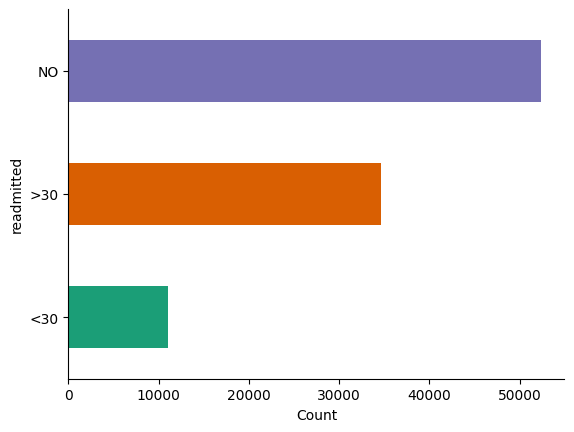

In [25]:
# @title readmitted

from matplotlib import pyplot as plt
import seaborn as sns
pandas_df_tar.groupby('readmitted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')

In [26]:
# prompt: Using dataframe pandas_df_tar: replace the categories >30 and NO by 0, and <30 by 1 and save this df as pandas_df_tar_binom

pandas_df_tar_binom = pandas_df_tar.copy()
pandas_df_tar_binom['readmitted'] = pandas_df_tar_binom['readmitted'].replace({'>30': 0, 'NO': 0, '<30': 1})
pandas_df_tar_binom['readmitted'].value_counts()

readmitted
0    86987
1    11066
Name: count, dtype: int64

Text(0.5, 0, 'Count')

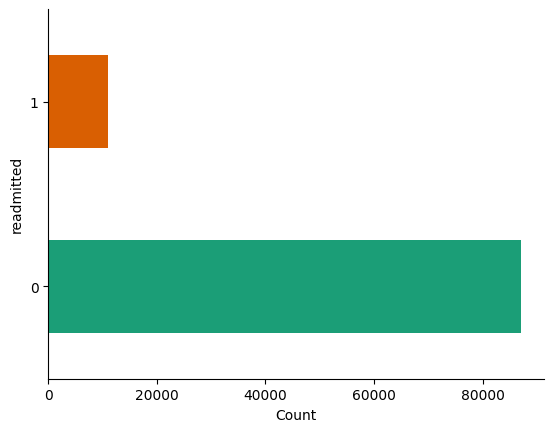

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
pandas_df_tar_binom.groupby('readmitted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')

looking at descriptions of the data

In [28]:
pandas_df_numeric.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,insulin,change,diabetesMed,diag_1_encoded,diag_2_encoded,diag_3_encoded,Thiazolidinediones,2nd gen sulfnylurea,Meglitinides
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,1.659011,0.461189,6.126034,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,16.119650,...,0.217882,0.884165,0.538219,0.768472,62.143065,75.532926,72.977502,0.142974,0.321704,0.024956
std,0.860882,0.498514,1.559075,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,8.108476,...,0.474207,1.024415,0.498540,0.421811,35.572248,38.924197,38.782626,0.377981,0.577228,0.174390
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,1.000000,23.000000,28.000000,29.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,6.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,...,0.000000,1.000000,1.000000,1.000000,59.000000,87.000000,69.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,7.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,...,0.000000,1.000000,1.000000,1.000000,92.000000,108.000000,108.000000,0.000000,1.000000,0.000000
max,4.000000,2.000000,9.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,...,3.000000,3.000000,1.000000,1.000000,120.000000,143.000000,143.000000,3.000000,3.000000,3.000000


Try some correlation analysis

In [29]:
pandas_df_numeric.isna().sum()




race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
insulin                     0
change                      0
diabetesMed                 0
diag_1_encoded              0
diag_2_encoded              0
diag_3_encoded              0
Thiazolidinediones          0
2nd gen sulfnylurea         0
Meglitinides                0
dtype: int64

In [30]:
#this block is not needed as the nans were replaced with none and encoded

# Filling NaN values with the mean or median using -> mean for now so order processes can run
#pandas_df_numeric['max_glu_serum'].fillna(pandas_df_numeric['max_glu_serum'].mean(), inplace=True)
#pandas_df_numeric['A1Cresult'].fillna(pandas_df_numeric['A1Cresult'].mean(), inplace=True)
#pandas_df_numeric.isna().sum()

In [31]:
# prompt: merge pandas_df_numeric and pandas_df_tar_binom
import pandas as pd
import numpy as np

#Merge pandas_df_numeric and pandas_df_tar_binom
df_merged = pd.merge(pandas_df_numeric, pandas_df_tar_binom, left_index=True, right_index=True)
pandas_df_numeric.isna()
# Generate VIF matrix
#vif_df = pd.DataFrame()
#vif_df["features"] = df_merged.columns
#vif_df["vif_value"] = [vif(df_merged.values, i) for i in range(df_merged.shape[1])]

# Identify highly collinear features
#threshold = 5
#high_vif_features = vif_df[vif_df["vif_value"] > threshold]["features"].tolist()

# Print the highly collinear features
#print("Highly collinear features:")
#print(high_vif_features)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,insulin,change,diabetesMed,diag_1_encoded,diag_2_encoded,diag_3_encoded,Thiazolidinediones,2nd gen sulfnylurea,Meglitinides
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# prompt: in df_merged, generate a correlation matrix and identify the pairs of features with high correlation, threshold being 0.4

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df_merged.corr()

# Select the pairs of features with high correlation
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.4:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the pairs of features with high correlation
print("Pairs of features with high correlation (threshold 0.4):")
for pair in high_correlation_pairs:
    print(f"{pair[0]}, {pair[1]}")


Pairs of features with high correlation (threshold 0.4):
admission_source_id, max_glu_serum
time_in_hospital, num_medications
insulin, change
insulin, diabetesMed
change, diabetesMed


split data into training and testing sets

In [33]:
from sklearn.model_selection import train_test_split

X = pandas_df_numeric
#y = pandas_df_tar
y = pandas_df_tar_binom

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data for testing

SMOTE application

In [34]:
#SMOTE application:
#print(X_train.shape)
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set to handle class imbalance
smt = SMOTE(random_state=42, sampling_strategy = 0.8)
#smt = SMOTE(random_state=42)
X_smote, y_smote = smt.fit_resample(X, y)

print("New class distribution after SMOTE:", Counter(y_smote['readmitted']))

#A before and after of the dataset before the application of SMOTE and after
print("Shape of X and y before SMOTE:", X.shape, " and ", y.shape)
print("Shape of X and y after SMOTE:", X_smote.shape, " and ", y_smote.shape)

print(y_smote.head)

New class distribution after SMOTE: Counter({0: 86987, 1: 69589})
Shape of X and y before SMOTE: (98053, 26)  and  (98053, 1)
Shape of X and y after SMOTE: (156576, 26)  and  (156576, 1)
<bound method NDFrame.head of         readmitted
0                0
1                0
2                0
3                0
4                0
...            ...
156571           1
156572           1
156573           1
156574           1
156575           1

[156576 rows x 1 columns]>


*How is smote being applied?*

We are applying smote before train test split. Thus, the testing dataset also consists of synthetic data, and has the ratio as per smote (we are not using stratified sampling for splitting but we can assume similar distribution)

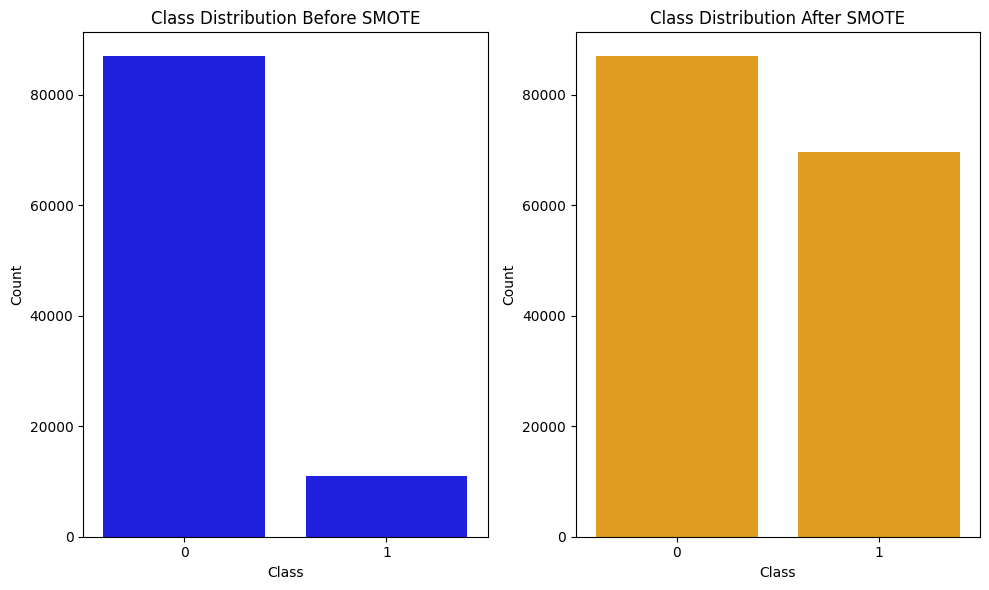

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

original_counts = Counter(y['readmitted'])
new_counts = Counter(y_smote['readmitted'])

# Create a bar plot to visualize the class distribution before and after SMOTE
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')

# Create a bar plot to visualize the class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=list(new_counts.keys()), y=list(new_counts.values()), color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

In [36]:
# alternative, using random under sampling
# first, do train test split. Then, perform smote or undersampling only on the training data
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None) # try with and without stratification

# undersample
undersampler = RandomUnderSampler( random_state=42,sampling_strategy=0.8)#{0:3, 1:1}) # only for training data
X_under_train, y_under_train = undersampler.fit_resample(X_train, y_train)
print("Class distribution after undersampling:")
print(sorted(Counter(y_under_train).items()))
#smote train
smt_train = SMOTE(random_state=42, sampling_strategy = 0.8)
X_smote_train, y_smote_train = smt.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:")
print(sorted(Counter(y_smote_train).items()))

Class distribution after undersampling:
[('readmitted', 1)]
Class distribution after SMOTE:
[('readmitted', 1)]


In [37]:
print(np.sum(y_train == 1))
print(np.sum(y_train == 0))

print(np.sum(y_smote_train == 1))
print(np.sum(y_smote_train == 0))

print(np.sum(y_under_train == 1))
print(np.sum(y_under_train == 0))

readmitted    8863
dtype: int64
readmitted    69579
dtype: int64
readmitted    55663
dtype: int64
readmitted    69579
dtype: int64
readmitted    8863
dtype: int64
readmitted    11078
dtype: int64


In [38]:
print(np.sum(y_test == 1))
print(np.sum(y_test == 0))
# all models in all iteratioins should be tested on this same test dataset

readmitted    2203
dtype: int64
readmitted    17408
dtype: int64


** Ways to do cross validation?**

We have made different types of train test splits, but cross validation is not included. Let's actually make the CV sets as well, to show how different models work in validation under different conditions.

Below is an updated version of what Sarth worked on but does not have the same hyperparameters from what I can tell. Also, generating a clone of the following cell but with undersmpled data rather than smote oversampled data.

In total, cases:
Smote before split and then checking model performance: pretty much even data
Smote after split: test set is uneven but realistic
Undersampling after split: less data for fitting
Undersampling before split(?): further less data??

Also, for train test split, we can try to work with stratified sampling techniques and see how it changes the model performance.

The next code is where we receive the result of .79 f1-score

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.6750223527909056
Logistic Regression Confusion Matrix:
[[11824  5481]
 [ 4696  9315]]


<Figure size 800x600 with 0 Axes>

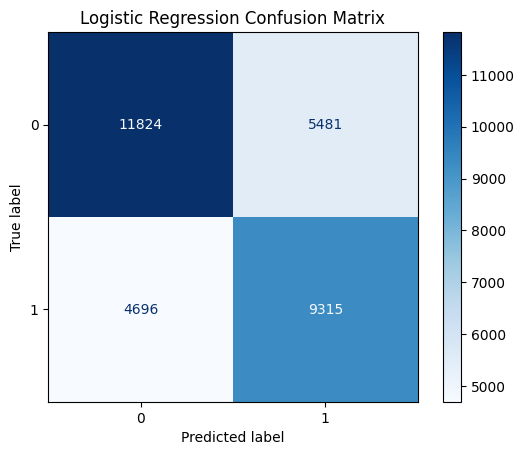

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     17305
           1       0.63      0.66      0.65     14011

    accuracy                           0.68     31316
   macro avg       0.67      0.67      0.67     31316
weighted avg       0.68      0.68      0.68     31316



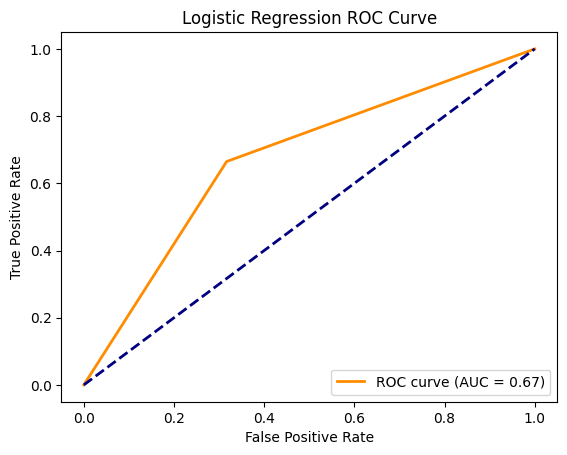

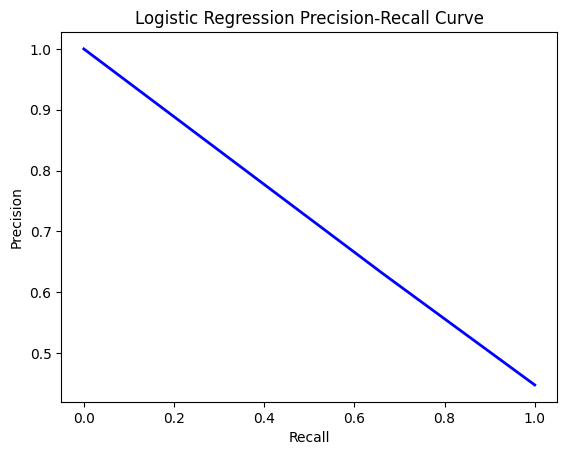

LinearSVC Accuracy: 0.6822391109975732
LinearSVC Confusion Matrix:
[[13830  3475]
 [ 6476  7535]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

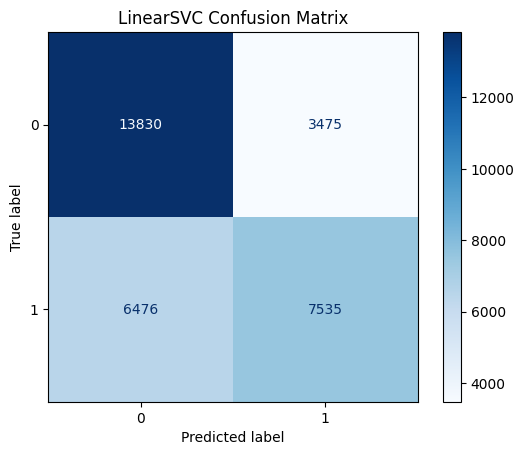

LinearSVC Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74     17305
           1       0.68      0.54      0.60     14011

    accuracy                           0.68     31316
   macro avg       0.68      0.67      0.67     31316
weighted avg       0.68      0.68      0.68     31316



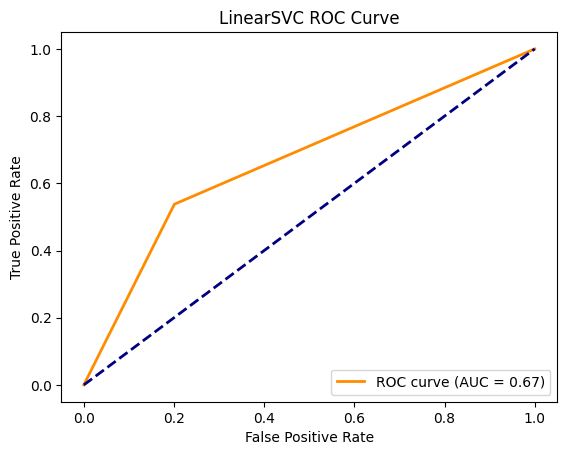

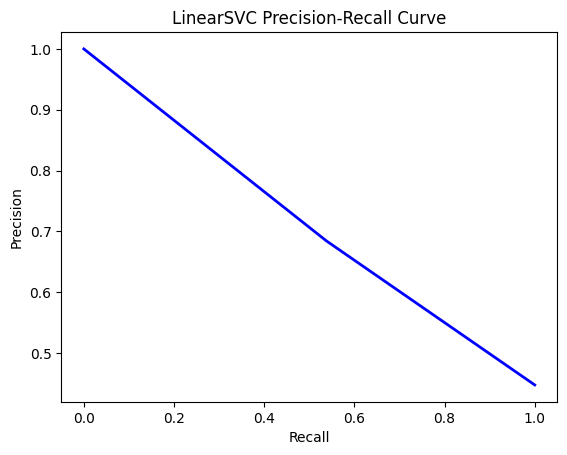

XGBoost Accuracy: 0.8261272193128113
XGBoost Confusion Matrix:
[[15613  1692]
 [ 3753 10258]]


<Figure size 800x600 with 0 Axes>

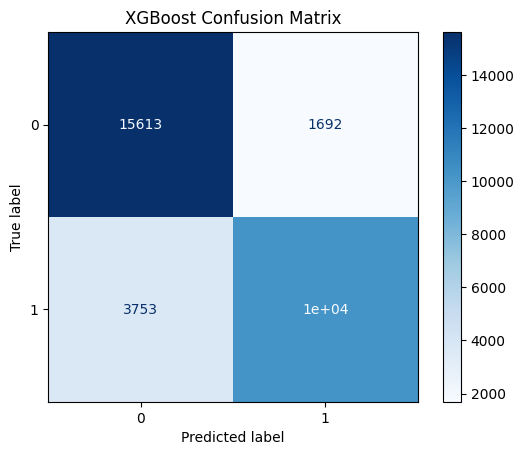

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     17305
           1       0.86      0.73      0.79     14011

    accuracy                           0.83     31316
   macro avg       0.83      0.82      0.82     31316
weighted avg       0.83      0.83      0.82     31316



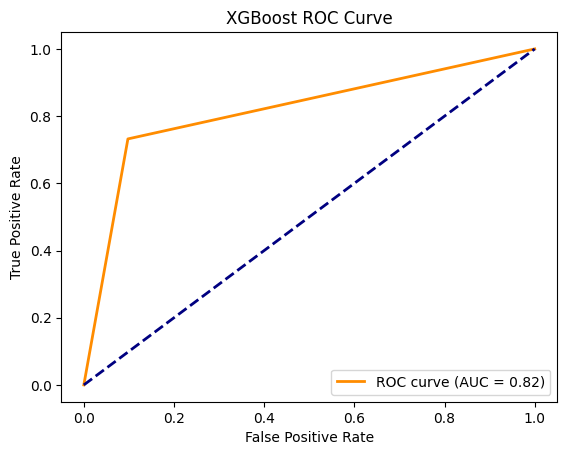

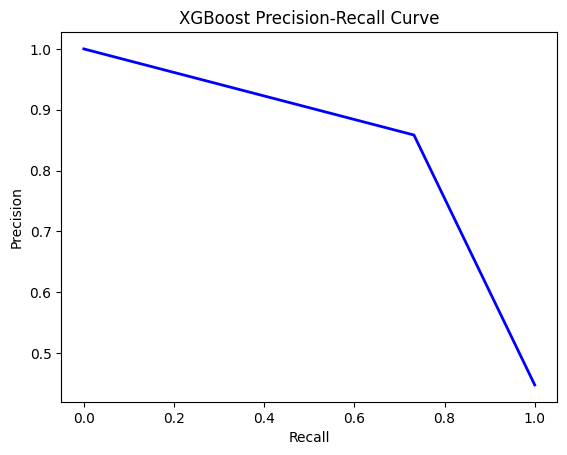

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_smote and y_smote are your oversampled dataset ready to be used
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Ensure y_train and y_test are 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
k = 10  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k)
X_train_kbest = selector.fit_transform(X_train_scaled, y_train)
X_test_kbest = selector.transform(X_test_scaled)

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Removed 'l1' penalty due to the error
}
log_reg = LogisticRegression(class_weight='balanced', solver='lbfgs')  # Specify the solver
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_kbest, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_

# Model evaluation
models = {
    'Logistic Regression': best_model,
    'LinearSVC': LinearSVC(),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    model.fit(X_train_kbest, y_train)
    predictions = model.predict(X_test_kbest)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions))

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, predictions)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.show()